# Dogs classification

Authors: Michał Sułek, Andrzej Przybylski, Łukasz Kostrzewa, Patrycja Cieplicka
Date: 26.03.2021

In [23]:
import tensorflow as tf
import numpy as np
import os
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt

Load images

In [24]:
path = "images/subset/test/"

In [25]:
IMG_SIZE = 224

In [26]:
NUM_CLASSES = 3

In [27]:
def load_images(path, num_of_classes) :
    folders = os.listdir(path)
    max_classes = len(folders)
    
    dog_dict = {}
    for f in folders :
        dog_dict[f.split('-')[0]] = f.split('-')[1]
    
    image_files = []
    labels = []
    
    for num,f in enumerate(folders):
        images = os.listdir(path + f)
        if num == num_of_classes or max_classes == num: break;
        for i in images:
            image_files.append(resize(io.imread(path +f +"/" + i), (IMG_SIZE, IMG_SIZE, 3)))
            labels.append(dog_dict[f.split('-')[0]])
    
    return image_files, labels

In [28]:
image_files, labels = load_images(path, NUM_CLASSES)

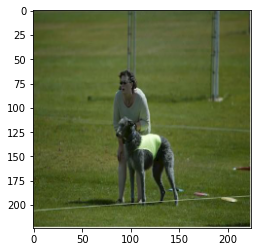

In [29]:
plt.imshow(image_files[0])

Load MobileNetV3 model

include_top = True (1000 classes)

include_top = False (without classifier) -> pooling ='avg' (to 2D array)

In [30]:
model = tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3), alpha=1.0, minimalistic=False, include_top=True,
    weights='imagenet', input_tensor=None, pooling=None, dropout_rate=0.2, classifier_activation='softmax'
)

In [31]:
model.summary()

_____________________
re_lu_56 (ReLU)                 (None, 14, 14, 240)  0           tf.__operators__.add_34[0][0]    
__________________________________________________________________________________________________
tf.math.multiply_34 (TFOpLambda (None, 14, 14, 240)  0           re_lu_56[0][0]                   
__________________________________________________________________________________________________
multiply_23 (Multiply)          (None, 14, 14, 240)  0           tf.math.multiply_34[0][0]        
                                                                 expanded_conv_6/depthwise/BatchNo
__________________________________________________________________________________________________
expanded_conv_6/project (Conv2D (None, 14, 14, 80)   19200       multiply_23[0][0]                
__________________________________________________________________________________________________
expanded_conv_6/project/BatchNo (None, 14, 14, 80)   320         expanded_conv_6/projec

Prepare input data to fit model

In [32]:
X = np.stack(image_files)

In [33]:
X = tf.keras.applications.mobilenet_v3.preprocess_input(X, data_format=None)

In [34]:
prediction = model(X)

In [35]:
prediction.shape

TensorShape([143, 1000])